### Import cytview, pandas and matplotlib


In [1]:
import cytview as cv
import pandas as pd
import matplotlib.pyplot as plt

### Read your experimental results into a pandas dataframe

In [2]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

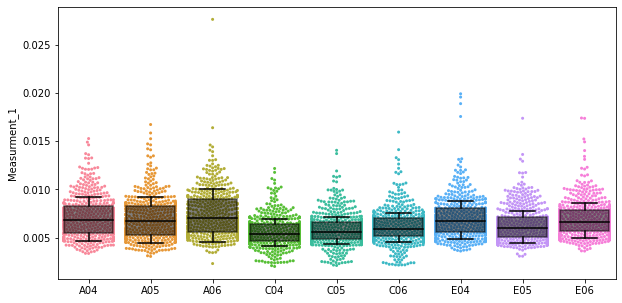

In [3]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])
plot = cv.cell_plot(df, measurement= "Measurement_1", identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [4]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
1178,0.009655,0.003967,0.005987,0.004241,0.004815,0.004032,0.006759,0.008632,0.007669
702,0.011729,0.005633,0.005121,0.004131,0.006322,0.005131,0.006075,0.009052,0.009148
1927,0.005375,0.006613,0.005627,0.004512,0.006415,0.005706,0.006757,0.005590,0.005685
379,0.013262,0.008660,0.008331,0.005961,0.002400,0.006443,0.005191,0.005662,0.010335
2792,0.005434,0.005795,0.006963,0.004196,0.004919,0.008317,0.005605,0.004602,0.005963
...,...,...,...,...,...,...,...,...,...
1398,0.011656,0.009598,0.006994,0.004177,0.007208,0.007589,0.005814,0.004971,0.006080
1026,0.009760,0.006594,0.007911,0.005713,0.002524,0.005573,0.005360,0.004997,0.006471
3800,0.012264,0.006007,0.009362,0.005227,0.008364,0.011766,0.010800,0.007234,0.007199
2622,0.007667,0.007008,0.007535,0.004104,0.005417,0.011828,0.009761,0.005835,0.004669


In [5]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007142,0.006985,0.007470,0.005617,0.005856,0.006157,0.007037,0.006362,0.006967
std,0.002145,0.002223,0.002446,0.001547,0.001680,0.001807,0.002130,0.001804,0.001915
min,0.003363,0.003057,0.002316,0.002017,0.002116,0.002159,0.003611,0.003076,0.003610
25%,0.005499,0.005307,0.005567,0.004690,0.004822,0.005138,0.005578,0.005053,0.005652
50%,0.006806,0.006674,0.007031,0.005419,0.005613,0.005938,0.006689,0.006000,0.006625
75%,0.008329,0.008290,0.009028,0.006399,0.006605,0.007002,0.008053,0.007132,0.007896
max,0.015267,0.016721,0.027617,0.012168,0.014050,0.015937,0.019904,0.017370,0.017396


### Analyse replicate data and perform statistical analysis

Sample 1 vs Sample 2 : p value:  0.003606  ( ** )
Sample 2 vs Sample 3 : p value:  0.016225  ( * )


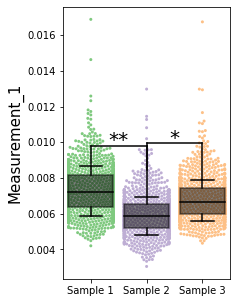

In [6]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Choose which groups to compare by their indexes, this will perform a one-way ANOVA
between the means of Sample 1 vs Sample 2 as well as Sample 2 vs Sample 3.
"""
compare = [[0,1],[1,2]]

"""
Plot the data and specify the groupings, labels and comparisons with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, compare=compare, draw=True)

    

### View the dataframe generated from replicates and output the summary data

In [7]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"]

,Sample 1,Sample 2,Sample 3
4292,0.010322,0.005717,0.006677
132,0.007048,0.005208,0.005962
1726,0.006757,0.007496,0.005702
2260,0.007514,0.005540,0.006162
1292,0.005459,0.005872,0.005626
...,...,...,...
4522,0.007120,0.005186,0.006041
2744,0.006034,0.006542,0.007311
1518,0.007530,0.005586,0.006215
1690,0.006467,0.005847,0.005925


In [8]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,Sample 1,Sample 2,Sample 3
count,1000.000000,1000.000000,1000.000000
mean,0.007325,0.005942,0.006817
std,0.001374,0.001137,0.001219
min,0.004203,0.003047,0.004348
25%,0.006393,0.005201,0.005998
50%,0.007221,0.005844,0.006634
75%,0.008148,0.006544,0.007442
max,0.016880,0.012976,0.016739


In [9]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()


,A04,A05,A06,C04,C05,C06,E04,E05,E06
1098,0.009837,0.006668,0.009356,0.004012,0.006605,0.006908,0.005362,0.004919,0.009129
1475,0.005162,0.004885,0.005022,0.005458,0.005583,0.002408,0.006438,0.006110,0.004771
3602,0.007975,0.004090,0.005217,0.005260,0.005381,0.010659,0.009306,0.007352,0.010183
1088,0.008904,0.008486,0.008666,0.008669,0.003724,0.005576,0.005732,0.008380,0.005101
398,0.004785,0.006044,0.005436,0.004316,0.004303,0.007944,0.006375,0.006381,0.005767
